In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
from utils import boxplots_utils
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



In [3]:
num_robots = 24
num_areas = 8
runs = 100

In [41]:
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/temp_results/results_adaptive/four_regions/four_regions_2021-05-19_robots#24_timeout#2_redAreas#4_1800seconds'

In [42]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/temp_results/results_adaptive/four_regions/four_regions_2021-05-19_robots#24_timeout#2_redAreas#4_1800seconds exists


In [43]:
# df_area_client = pd.DataFrame()
# df_area_server = pd.DataFrame()
# df_task_client = pd.DataFrame()
# df_task_server = pd.DataFrame()
# df_kilo_client = pd.DataFrame()
# df_kilo_server = pd.DataFrame()

for filename in natsorted(os.listdir(results_folder)):
#     print('\t filename: ', filename)
    seed = filename.split("_")[0]
    if seed == 'seed#2':
        break
    
    if filename.endswith("areaLOG_client.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename)
        df_area_client = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)

    if filename.endswith("areaLOG_server.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename)
        df_area_server = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)

    if filename.endswith("taskLOG_client.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename)
        df_task_client = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)

    if filename.endswith("taskLOG_server.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename)
        df_task_server = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)

    if filename.endswith("kiloLOG_client.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename)
        df_kilo_client = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)

    if filename.endswith("kiloLOG_server.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename, end='\n')
        df_kilo_server = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)

	filename:  seed#1_areaLOG_client.tsv
	filename:  seed#1_areaLOG_server.tsv
	filename:  seed#1_completed_taskLOG_client.tsv
	filename:  seed#1_completed_taskLOG_server.tsv
	filename:  seed#1_kiloLOG_client.tsv
	filename:  seed#1_kiloLOG_server.tsv


In [44]:
seed

'seed#2'

### Kilo LOG part

In [45]:
if len(df_kilo_client.columns) > 145:
    print("Cutting null elements in client kilo df")
    df_kilo_client.drop(df_kilo_client.columns[len(df_kilo_client.columns) - 1], axis=1, inplace=True)

if len(df_kilo_server.columns) > 145:
    print("Cutting null elements in server kilo df")
    df_kilo_server.drop(df_kilo_server.columns[len(df_kilo_server.columns) - 1], axis=1, inplace=True)

col_kilo_labels = ['time']
for i in range(0, len(df_kilo_server.columns) - 1, 6):
    #     print(i,end=", ")
    col_kilo_labels += ['id' + str(i // 6), 'state' + str(i // 6), 'posx' + str(i // 6), 'posy' + str(i // 6),
                        'ori' + str(i // 6), 'same_state' + str(i // 6)]

col_kilo_to_drop = []
for i in range((len(df_kilo_server.columns) - 1) // 6):
    #     print(i,end=", ")
    col_kilo_to_drop += ['same_state' + str(i)]

df_kilo_server.columns = col_kilo_labels
df_kilo_client.columns = col_kilo_labels
df_kilo_server = df_kilo_server.drop(col_kilo_to_drop, axis=1)
df_kilo_client = df_kilo_client.drop(col_kilo_to_drop, axis=1)

# kID0_client = df_kilo_client.iloc[:, :6]
# kID0_server = df_kilo_server.iloc[:, :6]

Cutting null elements in client kilo df
Cutting null elements in server kilo df


### area LOG part

In [46]:
col_area_labels = ['time']
for i in range(0, len(df_area_server.columns) - 2, 6):
    # print(i, end=", ")
    col_area_labels += ['id' + str(i // 6), 'posx' + str(i // 6), 'posy' + str(i // 6), 'color' + str(i // 6),
                        'completed' + str(i // 6), 'contained' + str(i // 6)]

# Remove last empty col and assign labels to df_area_server
if len(df_area_server.columns) > 49:
    print("Cutting null elements in area server df")
    df_area_server.drop(df_area_server.columns[len(df_area_server.columns) - 1], axis=1, inplace=True)
df_area_server.columns = col_area_labels

# First df_area_client row contains garbage, so is substituted with the second row except for the time,
# then remove Nan values in [:,49:]
if len(df_area_client.columns) > 49:
    print("Cutting null elements in area client df")
    df_area_client.loc[0, 1:] = df_area_client.loc[1, 1:]
    df_area_client = df_area_client.drop(np.arange(49, len(df_area_client.columns)), axis=1)
df_area_client.columns = col_area_labels

Cutting null elements in area server df
Cutting null elements in area client df


### completed task LOG part

In [47]:
# task_label = ['time', 'id', 'creationTime', 'completitionTime', 'color', 'contained']
# df_task_client.columns = task_label

#### Get area positions and colors

In [48]:
area_color_label = []
for i in range(num_areas):
    area_color_label += ["color"+str(i)]
#     print("color"+str(i))
# area_color_label

areas_client_color = df_area_client[area_color_label].iloc[0, :].values
areas_server_color = df_area_server[area_color_label].iloc[0, :].values

print(areas_client_color)
print(areas_server_color)

[1 0 1 0 1 0 1 0]
[1 1 1 1 0 0 0 0]


In [49]:
area_pos_label = []
for i in range(num_areas):
    area_pos_label += ["posx"+str(i)]
    area_pos_label += ["posy"+str(i)]
# area_pos_label

areas_pos = df_area_client[area_pos_label].iloc[0, :].values

print(areas_pos)

[-0.125 0.375 0.125 0.375 -0.125 0.125 0.125 0.125 -0.375 -0.125 0.375 -0.125 -0.125 -0.375 0.125 -0.375]


In [50]:
areas_pos = areas_pos.reshape(-1,2)
areas_pos

array([[-0.125, 0.375],
       [0.125, 0.375],
       [-0.125, 0.125],
       [0.125, 0.125],
       [-0.375, -0.125],
       [0.375, -0.125],
       [-0.125, -0.375],
       [0.125, -0.375]])

In [51]:
df_kilo_client_temp = df_kilo_client.copy()#.iloc[:20,:26]
df_kilo_server_temp = df_kilo_server.copy()
df_kilo_server_temp.iloc[:10,:]

,time,id0,state0,posx0,posy0,ori0,id1,state1,posx1,posy1,ori1,id2,state2,posx2,posy2,ori2,id3,state3,posx3,posy3,ori3,id4,state4,posx4,posy4,ori4,id5,state5,posx5,posy5,ori5,id6,state6,posx6,posy6,ori6,id7,state7,posx7,posy7,ori7,id8,state8,posx8,posy8,ori8,id9,state9,posx9,posy9,ori9,id10,state10,posx10,posy10,ori10,id11,state11,posx11,posy11,ori11,id12,state12,posx12,posy12,ori12,id13,state13,posx13,posy13,ori13,id14,state14,posx14,posy14,ori14,id15,state15,posx15,posy15,ori15,id16,state16,posx16,posy16,ori16,id17,state17,posx17,posy17,ori17,id18,state18,posx18,posy18,ori18,id19,state19,posx19,posy19,ori19,id20,state20,posx20,posy20,ori20,id21,state21,posx21,posy21,ori21,id22,state22,posx22,posy22,ori22,id23,state23,posx23,posy23,ori23
0,0.1,0,0,-0.2084,0.3611,-2.0288,1,0,0.3780,0.3594,1.4695,2,0,-0.0934,0.1360,-2.6501,3,0,0.1691,-0.3275,2.3245,4,0,0.2290,0.1255,1.4469,5,0,0.0044,-0.0152,2.9721,6,0,0.2600,-0.2504,-0.3994,7,0,-0.369,-0.3322,-0.4196,8,0,0.3826,-0.1278,2.8536,9,0,0.2350,-0.3441,-0.2352,10,0,0.0496,0.0744,1.3389,11,0,-0.2742,-0.2844,2.7954,12,0,-0.1450,-0.0790,2.3267,13,0,-0.0286,-0.0908,2.4400,14,0,-0.3344,-0.2323,2.6212,15,0,-0.0545,0.0658,0.0225,16,0,0.3374,0.3396,-3.0512,17,0,0.3890,0.1701,-2.0467,18,0,0.0353,-0.3509,0.5112,19,0,0.1715,-0.2719,1.0511,20,0,0.2545,-0.2961,-2.2235,21,0,-0.2906,0.3276,-0.0069,22,0,-0.0655,0.3951,-0.5322,23,0,-0.0896,-0.1340,-2.3736
1,1.0,0,0,-0.2141,0.3553,-2.7278,1,0,0.3763,0.3673,2.1685,2,1,-0.0952,0.1351,-2.8072,3,1,0.1677,-0.3262,2.4816,4,0,0.2274,0.1335,2.1459,5,0,-0.0028,-0.0114,2.2731,6,0,0.2681,-0.2510,0.2996,7,0,-0.363,-0.3377,-1.0480,8,1,0.3808,-0.1272,2.6965,9,0,0.2435,-0.3463,0.4638,10,0,0.0489,0.0825,2.0379,11,0,-0.2823,-0.2842,-2.7888,12,0,-0.1522,-0.0749,2.7979,13,0,-0.0362,-0.0877,3.1390,14,0,-0.3398,-0.2263,1.9222,15,0,-0.0468,0.0634,-0.6765,16,0,0.3300,0.3363,-2.3522,17,0,0.3877,0.1620,-1.3477,18,0,0.0423,-0.3463,0.5897,19,0,0.1776,-0.2665,0.3521,20,0,0.2505,-0.3012,-1.9879,21,0,-0.2826,0.3253,-0.3996,22,1,-0.0638,0.3942,-0.3752,23,0,-0.0934,-0.1412,-1.6746
2,2.0,0,0,-0.2237,0.3531,-2.9712,1,0,0.3706,0.3755,2.1764,2,1,-0.0952,0.1351,-2.8072,3,1,0.1677,-0.3262,2.4816,4,0,0.2198,0.1393,2.9313,5,0,-0.0062,-0.0024,1.4877,6,0,0.2773,-0.2472,0.6137,7,0,-0.358,-0.3464,-1.0480,8,1,0.3808,-0.1272,2.6965,9,0,0.2520,-0.3487,0.6288,10,0,0.0443,0.0914,2.0457,11,0,-0.2898,-0.2903,-2.2312,12,0,-0.1616,-0.0715,2.7979,13,0,-0.0452,-0.0909,-2.3588,14,0,-0.3399,-0.2167,1.1368,15,0,-0.0418,0.0552,-1.4619,16,0,0.3252,0.3278,-1.9517,17,0,0.3928,0.1540,-0.5623,18,0,0.0507,-0.3407,0.5897,19,0,0.1872,-0.2662,-0.2055,20,0,0.2463,-0.3065,-1.9879,21,0,-0.2734,0.3214,-0.3996,22,1,-0.0638,0.3942,-0.3752,23,0,-0.0911,-0.1505,-0.8892
3,3.0,0,0,-0.2336,0.3514,-2.9712,1,0,0.3649,0.3838,2.1764,2,1,-0.0952,0.1351,-2.8072,3,1,0.1677,-0.3262,2.4816,4,0,0.2101,0.1383,-2.8728,5,0,-0.0025,0.0066,1.0086,6,0,0.2828,-0.2394,1.3991,7,0,-0.353,-0.3550,-1.0480,8,1,0.3808,-0.1272,2.6965,9,0,0.2605,-0.3452,0.6288,10,0,0.0397,0.1003,2.0457,11,0,-0.2960,-0.2982,-2.2312,12,0,-0.1710,-0.0682,2.7979,13,0,-0.0517,-0.0985,-2.2724,14,0,-0.3350,-0.2080,1.0504,15,0,-0.0437,0.0457,-1.9410,16,0,0.3215,0.3185,-1.9517,17,0,0.4021,0.1504,-0.3188,18,1,0.0544,-0.3382,0.5897,19,0,0.1970,-0.2683,-0.2055,20,0,0.2422,-0.3153,-1.9879,21,0,-0.2642,0.3176,-0.3996,22,1,-0.0638,0.3942,-0.3752,23,0,-0.0830,-0.1556,-0.3315
4,4.0,0,0,-0.2434,0.3497,-2.9712,1,0,0.3592,0.3920,2.1764,2,1,-0.0952,0.1351,-2.8072,3,1,0.1677,-0.3262,2.4816,4,1,0.2028,0.1363,-2.8728,5,0,0.0028,0.0151,1.0086,6,0,0.2817,-0.2297,1.7997,7,0,-0.348,-0.3637,-1.0480,8,1,0.3808,-0.1272,2.6965,9,0,0.2686,-0.3393,0.6288,10,0,0.0352,0.1092,2.0457,11,0,-0.3021,-0.3061,-2.2312,12,0,-0.1804,-0.0648,2.7979,13,0,-0.0582,-0.1061,-2.2724,14,0,-0.3300,-0.1993,1.0504,15,0,-0.0473,0.0363,-1.9410,16,0,0.3178,0.3092,-1.9517,17,0,0.4116,0.1472,-0.3188,18,1,0.0544,-0.3382,0.5897,19,0,0.2068,-0.2703,-0.2055,20,0,0.2381,-0.3245,-1.9879,21,0,-0.2549,0.3137,-0.3996,22,1,-0.0638,0.3942,-0.37

In [52]:
# for kilo_id in np.arange(1, len(df_kilo_client_temp.columns), 5):
#     print(colored("kilo_id:"+str((kilo_id-1)//5), 'blue'))
# #     print(df_kilo_client.iloc[:20, kilo_id+2:kilo_id+4].values, end='\n\n')
#     kilo_pos = df_kilo_client_temp.iloc[:5, kilo_id+2:kilo_id+4].values
#     in_area=np.empty(kilo_pos.shape[0], dtype=int); in_area.fill(-1)
#     for area_idx, area_pos in enumerate(areas_pos):
#     #     print(area_idx,' ', area_pos)
#         dist = np.linalg.norm(kilo_pos-area_pos, axis=1)
#     #     print(dist, end='\n\n')
#         in_area = np.where(dist < 0.08, df_area_colors.iloc[area_idx][-1], in_area)
# #     in_area = np.where(in_area == -1, np.NaN, in_area)
#     print(in_area)
    

## Area color df

In [53]:
color_list = ["color" + str(i) for i in range(num_areas)]

In [54]:
df_area3_s = df_area_server.iloc[:1, :][color_list]
df_area3_c = df_area_client.iloc[:1, :][color_list]
# [['color0', 'color1', 'color2', 'color3', 'color4', 'color5', 'color6', 'color7']]
#[['color0', 'completed0', 'color1', 'completed1', 'color2', 'completed2', 'color3', 'completed3', 'color4', 'completed4', 'color5', 'completed5', 'color6', 'completed6', 'color7', 'completed7']]

In [55]:
for i,idx in enumerate(range(1,len(df_area3_c.columns)*2,2)):
#     print(i, ' ', idx)
    df_area3_c.insert(loc=idx, column='other_col'+str(i), value=df_area3_s.iloc[0][i])
    
df_area3_c

,color0,other_col0,color1,other_col1,color2,other_col2,color3,other_col3,color4,other_col4,color5,other_col5,color6,other_col6,color7,other_col7
0,1.0,1,0.0,1,1.0,1,0.0,1,1.0,0,0.0,0,1.0,0,0.0,0


In [56]:
client = [col for col in df_area3_c.columns if 'color' in col]
server = [col for col in df_area3_c.columns if 'other_col' in col]
df_area_colors = pd.lreshape(df_area3_c, {'color_client' : client, 'color_server' : server})
df_area_colors

,color_client,color_server
0,1.0,1
1,0.0,1
2,1.0,1
3,0.0,1
4,1.0,0
5,0.0,0
6,1.0,0
7,0.0,0


In [57]:
area_type = []
for area in df_area_colors.values:
    if(area[0] == 0 and area[1] == 0):
        area_type += ['BB']
    if(area[0] == 0 and area[1] == 1):
        area_type += ['BR']
    if(area[0] == 1 and area[1] == 0):
        area_type += ['RB']
    if(area[0] == 1 and area[1] == 1):
        area_type += ['RR']
area_type

['RR', 'BR', 'RR', 'BR', 'RB', 'BB', 'RB', 'BB']

In [58]:
df_area_colors.insert(loc=2, column='area_type', value=area_type)

In [59]:
df_area_colors

,color_client,color_server,area_type
0,1.0,1,RR
1,0.0,1,BR
2,1.0,1,RR
3,0.0,1,BR
4,1.0,0,RB
5,0.0,0,BB
6,1.0,0,RB
7,0.0,0,BB


## Per il server:

In [60]:
for i,kilo_id in enumerate(np.arange(1, len(df_kilo_server_temp.columns), 5)):
    print(colored("kilo_id:"+str((kilo_id-1)//5), 'blue'))
#     print(df_kilo_client_temp.iloc[:20, kilo_id+2:kilo_id+4].values, end='\n\n')
    kilo_pos = df_kilo_server_temp.iloc[:, kilo_id+i+2:kilo_id+i+4].values
#     print(kilo_pos)
    in_area=np.empty(kilo_pos.shape[0], dtype=int); in_area.fill(-1)
    for area_idx, area_pos in enumerate(areas_pos):
    #     print(area_idx,' ', area_pos)
        dist = np.linalg.norm(kilo_pos-area_pos, axis=1)
    #     print(dist, end='\n\n')
        in_area = np.where(dist < 0.1, df_area_colors.iloc[area_idx][-1][::-1], in_area)
#     in_area = np.where(in_area == -1, np.NaN, in_area)
#     print(in_area)
    df_kilo_server_temp.insert(loc=int(kilo_id+i+2), column='area_type'+str(i), value=in_area)

kilo_id:0
kilo_id:1
kilo_id:2
kilo_id:3
kilo_id:4
kilo_id:5
kilo_id:6
kilo_id:7
kilo_id:8
kilo_id:9
kilo_id:10
kilo_id:11
kilo_id:12
kilo_id:13
kilo_id:14
kilo_id:15
kilo_id:16
kilo_id:17
kilo_id:18
kilo_id:19
kilo_id:20
kilo_id:21
kilo_id:22
kilo_id:23


In [61]:
df_kilo_server_temp.iloc[:2,:]

,time,id0,state0,area_type0,posx0,posy0,ori0,id1,state1,area_type1,posx1,posy1,ori1,id2,state2,area_type2,posx2,posy2,ori2,id3,state3,area_type3,posx3,posy3,ori3,id4,state4,area_type4,posx4,posy4,ori4,id5,state5,area_type5,posx5,posy5,ori5,id6,state6,area_type6,posx6,posy6,ori6,id7,state7,area_type7,posx7,posy7,ori7,id8,state8,area_type8,posx8,posy8,ori8,id9,state9,area_type9,posx9,posy9,ori9,id10,state10,area_type10,posx10,posy10,ori10,id11,state11,area_type11,posx11,posy11,ori11,id12,state12,area_type12,posx12,posy12,ori12,id13,state13,area_type13,posx13,posy13,ori13,id14,state14,area_type14,posx14,posy14,ori14,id15,state15,area_type15,posx15,posy15,ori15,id16,state16,area_type16,posx16,posy16,ori16,id17,state17,area_type17,posx17,posy17,ori17,id18,state18,area_type18,posx18,posy18,ori18,id19,state19,area_type19,posx19,posy19,ori19,id20,state20,area_type20,posx20,posy20,ori20,id21,state21,area_type21,posx21,posy21,ori21,id22,state22,area_type22,posx22,posy22,ori22,id23,state23,area_type23,posx23,posy23,ori23
0,0.1,0,0,RR,-0.2084,0.3611,-2.0288,1,0,-1,0.3780,0.3594,1.4695,2,0,RR,-0.0934,0.1360,-2.6501,3,0,BB,0.1691,-0.3275,2.3245,4,0,-1,0.2290,0.1255,1.4469,5,0,-1,0.0044,-0.0152,2.9721,6,0,-1,0.2600,-0.2504,-0.3994,7,0,-1,-0.369,-0.3322,-0.4196,8,0,BB,0.3826,-0.1278,2.8536,9,0,-1,0.2350,-0.3441,-0.2352,10,0,RB,0.0496,0.0744,1.3389,11,0,-1,-0.2742,-0.2844,2.7954,12,0,-1,-0.1450,-0.0790,2.3267,13,0,-1,-0.0286,-0.0908,2.440,14,0,-1,-0.3344,-0.2323,2.6212,15,0,RR,-0.0545,0.0658,0.0225,16,0,-1,0.3374,0.3396,-3.0512,17,0,-1,0.3890,0.1701,-2.0467,18,0,BB,0.0353,-0.3509,0.5112,19,0,-1,0.1715,-0.2719,1.0511,20,0,-1,0.2545,-0.2961,-2.2235,21,0,-1,-0.2906,0.3276,-0.0069,22,0,RR,-0.0655,0.3951,-0.5322,23,0,-1,-0.0896,-0.1340,-2.3736
1,1.0,0,0,RR,-0.2141,0.3553,-2.7278,1,0,-1,0.3763,0.3673,2.1685,2,1,RR,-0.0952,0.1351,-2.8072,3,1,BB,0.1677,-0.3262,2.4816,4,0,-1,0.2274,0.1335,2.1459,5,0,-1,-0.0028,-0.0114,2.2731,6,0,-1,0.2681,-0.2510,0.2996,7,0,-1,-0.363,-0.3377,-1.0480,8,1,BB,0.3808,-0.1272,2.6965,9,0,-1,0.2435,-0.3463,0.4638,10,0,RB,0.0489,0.0825,2.0379,11,0,-1,-0.2823,-0.2842,-2.7888,12,0,-1,-0.1522,-0.0749,2.7979,13,0,-1,-0.0362,-0.0877,3.139,14,0,-1,-0.3398,-0.2263,1.9222,15,0,RR,-0.0468,0.0634,-0.6765,16,0,-1,0.3300,0.3363,-2.3522,17,0,-1,0.3877,0.1620,-1.3477,18,0,BB,0.0423,-0.3463,0.5897,19,0,-1,0.1776,-0.2665,0.3521,20,0,-1,0.2505,-0.3012,-1.9879,21,0,-1,-0.2826,0.3253,-0.3996,22,1,RR,-0.0638,0.3942,-0.3752,23,0,-1,-0.0934,-0.1412,-1.6746


## Per il client:

In [62]:
for i,kilo_id in enumerate(np.arange(1, len(df_kilo_client_temp.columns), 5)):
    print(colored("kilo_id:"+str((kilo_id-1)//5), 'blue'))
#     print(df_kilo_client_temp.iloc[:20, kilo_id+2:kilo_id+4].values, end='\n\n')
    kilo_pos = df_kilo_client_temp.iloc[:, kilo_id+i+2:kilo_id+i+4].values
#     print(kilo_pos)
    in_area=np.empty(kilo_pos.shape[0], dtype=int); in_area.fill(-1)
    for area_idx, area_pos in enumerate(areas_pos):
    #     print(area_idx,' ', area_pos)
        dist = np.linalg.norm(kilo_pos-area_pos, axis=1)
    #     print(dist, end='\n\n')
        in_area = np.where(dist < 0.1, df_area_colors.iloc[area_idx][-1], in_area)
#     in_area = np.where(in_area == -1, np.NaN, in_area)
#     print(in_area)
    df_kilo_client_temp.insert(loc=int(kilo_id+i+2), column='area_type'+str(i), value=in_area)

kilo_id:0
kilo_id:1
kilo_id:2
kilo_id:3
kilo_id:4
kilo_id:5
kilo_id:6
kilo_id:7
kilo_id:8
kilo_id:9
kilo_id:10
kilo_id:11
kilo_id:12
kilo_id:13
kilo_id:14
kilo_id:15
kilo_id:16
kilo_id:17
kilo_id:18
kilo_id:19
kilo_id:20
kilo_id:21
kilo_id:22
kilo_id:23


In [63]:
df_kilo_client_temp.iloc[:2,:]

,time,id0,state0,area_type0,posx0,posy0,ori0,id1,state1,area_type1,posx1,posy1,ori1,id2,state2,area_type2,posx2,posy2,ori2,id3,state3,area_type3,posx3,posy3,ori3,id4,state4,area_type4,posx4,posy4,ori4,id5,state5,area_type5,posx5,posy5,ori5,id6,state6,area_type6,posx6,posy6,ori6,id7,state7,area_type7,posx7,posy7,ori7,id8,state8,area_type8,posx8,posy8,ori8,id9,state9,area_type9,posx9,posy9,ori9,id10,state10,area_type10,posx10,posy10,ori10,id11,state11,area_type11,posx11,posy11,ori11,id12,state12,area_type12,posx12,posy12,ori12,id13,state13,area_type13,posx13,posy13,ori13,id14,state14,area_type14,posx14,posy14,ori14,id15,state15,area_type15,posx15,posy15,ori15,id16,state16,area_type16,posx16,posy16,ori16,id17,state17,area_type17,posx17,posy17,ori17,id18,state18,area_type18,posx18,posy18,ori18,id19,state19,area_type19,posx19,posy19,ori19,id20,state20,area_type20,posx20,posy20,ori20,id21,state21,area_type21,posx21,posy21,ori21,id22,state22,area_type22,posx22,posy22,ori22,id23,state23,area_type23,posx23,posy23,ori23
0,0.1,0,0,-1,-0.2607,0.3622,0.4071,1,0,-1,-0.3433,-0.2326,1.0659,2,0,-1,0.2655,0.1613,2.6603,3,0,BB,0.3504,-0.1803,-0.7323,4,0,BR,0.0455,0.1321,-1.3097,5,0,BR,0.1563,0.2906,2.2984,6,0,RR,-0.1749,0.0956,1.6630,7,0,BR,0.1683,0.1723,-0.6124,8,0,-1,-0.3154,-0.0060,0.3881,9,0,-1,0.3558,0.2546,-1.6789,10,0,RB,-0.3088,-0.1252,1.7991,11,0,-1,0.1779,-0.0835,1.7921,12,0,-1,0.3197,0.2276,-1.3690,13,0,-1,0.2292,0.1075,-0.6003,14,0,-1,-0.2640,-0.2759,3.1336,15,0,-1,-0.3705,0.0185,2.7454,16,0,-1,0.2800,-0.2027,-2.8764,17,0,-1,-0.1025,0.0139,1.3230,18,0,-1,-0.2547,0.0614,1.2143,19,0,-1,0.2447,0.0239,1.536,20,0,RB,-0.0931,-0.3541,1.6180,21,0,-1,0.3990,0.2982,-2.1437,22,0,BB,0.1698,-0.3432,-0.0332,23,0,-1,-0.2257,0.1383,0.4376
1,1.0,0,0,-1,-0.2525,0.3629,-0.2919,1,0,-1,-0.3373,-0.2270,0.5161,2,0,-1,0.2578,0.1647,2.7389,3,1,BB,0.3511,-0.1809,-0.8108,4,1,BR,0.0458,0.1312,-1.3882,5,0,BR,0.1494,0.2951,2.6911,6,1,RR,-0.1749,0.0965,1.7415,7,1,BR,0.1691,0.1717,-0.6909,8,0,-1,-0.3073,-0.0055,-0.3109,9,0,-1,0.3528,0.2474,-2.3779,10,1,RB,-0.3090,-0.1243,1.7206,11,0,-1,0.1737,-0.0766,2.4911,12,0,-1,0.3233,0.2201,-0.8978,13,0,-1,0.2369,0.1042,-0.3647,14,0,-1,-0.2717,-0.2784,-2.4505,15,0,-1,-0.3787,0.0194,-3.0665,16,0,-1,0.2732,-0.2072,-2.1774,17,0,-1,-0.0981,0.0208,0.7733,18,0,-1,-0.2544,0.0695,1.9133,19,0,-1,0.2475,0.0316,0.837,20,1,RB,-0.0932,-0.3531,1.5395,21,0,-1,0.3926,0.2931,-2.8427,22,1,BB,0.1708,-0.3432,-0.1118,23,0,RR,-0.2197,0.1439,1.1366


## Jump to Estrazione di stato...

#### Save & Load pickle

In [ ]:
# df_kilo_client_temp.to_pickle('porcodddio')
# df_kilo_client_temp1= pd.read_pickle('porcodddio')
# df_kilo_client_temp1

In [ ]:
# Test

# in_area=np.empty(kID0_client_pos.shape[0], dtype=int); in_area.fill(-1)
# # print(in_area)
# for area_idx, area_pos in enumerate(areas_pos):
# #     print(area_idx,' ', area_pos)
#     dist = np.linalg.norm(kID0_client_pos-area_pos, axis=1)
# #     print(dist, end='\n\n')
#     in_area = np.where(dist < 0.08, df_area_colors.iloc[area_idx][-1], in_area)
# # in_area = np.where(in_area == -1, np.NaN, in_area)

In [ ]:
# in_area

In [ ]:
df_kilo_client_temp = df_kilo_client.iloc[:20, :6]
df_kilo_client_temp
df_kilo_client_temp.insert(loc=5, column='area_type', value=in_area)
df_kilo_client_temp

In [ ]:
# completed = df_area_client.iloc[:20, :][['completed1']]
# contained = df_area_client.iloc[:20, :][['contained1']]

In [ ]:
# df_kilo_client_temp.insert(loc=6, column='completed1' , value=completed)
# df_kilo_client_temp.insert(loc=7, column='contained1' , value=contained)

In [ ]:
# df_kilo_client_temp

In [ ]:
for idx, elem in enumerate(in_area):
#     print(idx, ' ', elem)
#     print(elem)
    if(elem != -1):
        print(df_area_colors.iloc[elem][-1])
#         print("hello")

In [ ]:
df_area_colors.iloc[1].values

In [ ]:
# Evaluate transition 0->1, 1->0
# df_transition = kID0_client[['state0']].rolling(2).apply(lambda x: x[0] != x[-1], raw=True).sum().astype(int)
# df_transition

## Estrazione di stato e tipo di area per ogni kilobot

In [64]:
kilo_resume = [["state" + str(i), "area_type" + str(i)] for i in range(num_robots)]

In [65]:
kilo_resume = np.reshape(kilo_resume, (-1))

In [66]:
print(kilo_resume)

['state0' 'area_type0' 'state1' 'area_type1' 'state2' 'area_type2' 'state3' 'area_type3' 'state4' 'area_type4' 'state5' 'area_type5' 'state6' 'area_type6' 'state7' 'area_type7' 'state8' 'area_type8' 'state9' 'area_type9' 'state10' 'area_type10' 'state11' 'area_type11' 'state12' 'area_type12' 'state13' 'area_type13' 'state14' 'area_type14' 'state15' 'area_type15' 'state16' 'area_type16' 'state17' 'area_type17' 'state18' 'area_type18' 'state19' 'area_type19' 'state20' 'area_type20' 'state21' 'area_type21' 'state22' 'area_type22' 'state23' 'area_type23']


In [67]:
server_kilo_resume = df_kilo_server_temp.iloc[:][kilo_resume]
client_kilo_resume = df_kilo_client_temp.iloc[:][kilo_resume]

In [68]:
client_kilo_resume.iloc[:2,:]

,state0,area_type0,state1,area_type1,state2,area_type2,state3,area_type3,state4,area_type4,state5,area_type5,state6,area_type6,state7,area_type7,state8,area_type8,state9,area_type9,state10,area_type10,state11,area_type11,state12,area_type12,state13,area_type13,state14,area_type14,state15,area_type15,state16,area_type16,state17,area_type17,state18,area_type18,state19,area_type19,state20,area_type20,state21,area_type21,state22,area_type22,state23,area_type23
0,0,-1,0,-1,0,-1,0,BB,0,BR,0,BR,0,RR,0,BR,0,-1,0,-1,0,RB,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,RB,0,-1,0,BB,0,-1
1,0,-1,0,-1,0,-1,1,BB,1,BR,0,BR,1,RR,1,BR,0,-1,0,-1,1,RB,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,1,RB,0,-1,1,BB,0,RR


In [69]:
server_kilo_resume.iloc[:2,:]

,state0,area_type0,state1,area_type1,state2,area_type2,state3,area_type3,state4,area_type4,state5,area_type5,state6,area_type6,state7,area_type7,state8,area_type8,state9,area_type9,state10,area_type10,state11,area_type11,state12,area_type12,state13,area_type13,state14,area_type14,state15,area_type15,state16,area_type16,state17,area_type17,state18,area_type18,state19,area_type19,state20,area_type20,state21,area_type21,state22,area_type22,state23,area_type23
0,0,RR,0,-1,0,RR,0,BB,0,-1,0,-1,0,-1,0,-1,0,BB,0,-1,0,RB,0,-1,0,-1,0,-1,0,-1,0,RR,0,-1,0,-1,0,BB,0,-1,0,-1,0,-1,0,RR,0,-1
1,0,RR,0,-1,1,RR,1,BB,0,-1,0,-1,0,-1,0,-1,1,BB,0,-1,0,RB,0,-1,0,-1,0,-1,0,-1,0,RR,0,-1,0,-1,0,BB,0,-1,0,-1,0,-1,1,RR,0,-1


In [70]:
total_exp_df = client_kilo_resume.join(server_kilo_resume, lsuffix='_c', rsuffix='_s')

In [71]:
total_exp_df.iloc[:,4:6]

,state2_c,area_type2_c
0,0,-1
1,0,-1
2,0,-1
3,0,-1
4,0,-1
5,0,-1
6,0,-1
7,0,-1
8,0,BR
9,0,BR


In [ ]:
# small_total_exp_df = total_exp_df.iloc[:,0:2]

In [ ]:
# small_total_exp_df = small_total_exp_df.replace(2, 3)

In [ ]:
# small_total_exp_df.iloc[:1,:]

In [ ]:
# mask = small_total_exp_df["state4_c"].shift().ne(small_total_exp_df["state4_c"])

In [ ]:
# mask

In [ ]:
# small_client_kilo = client_kilo_resume.iloc[:,0:2]
# small_client_kilo = small_client_kilo.replace(2,3)
# small_client_kilo

In [ ]:
# mask1 = (small_client_kilo[small_client_kilo.columns.values[0]].diff() == 2)#.sum(axis=0)

In [ ]:
# small_client_kilo[mask1]

In [ ]:
# small_client_kilo[mask1][small_client_kilo.columns.values[1]].value_counts().to_frame().T

In [ ]:
# len(server_kilo_resume.columns)

##### For each kilobot evaluate completed area type

In [ ]:
completed_area_count = pd.DataFrame(columns=['RR', 'RB', 'BR', 'BB'])
for i in range(0,len(total_exp_df.columns),2):
#     print(total_exp_df.iloc[:50,i:i+2])
    print('\n',i)
    kilo_state = total_exp_df.iloc[:,i:i+2]
#     kilo_state = kilo_state.replace(2,3)
    mask = (kilo_state[kilo_state.columns.values[0]].diff() == -1)
    print(kilo_state[mask])
    print(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), end='\n\n')
    robot_timeout = kilo_state[mask][kilo_state.columns.values[1]].value_counts().to_frame().T
#     robot_timeout = pd.DataFrame(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), columns=['RR, RB,BR,BB'])
#     print(robot_timeout)
    completed_area_count = completed_area_count.append(robot_timeout)
    print(robot_timeout, end='\n\n')
    
completed_area_count = completed_area_count.fillna(0)

In [ ]:
completed_area_count

##### For each kilobot evaluate elapsed timeout

In [72]:
timeout_count = pd.DataFrame(columns=['RR', 'RB', 'BR', 'BB'])
for i in range(0,len(total_exp_df.columns),2):
#     print(total_exp_df.iloc[:50,i:i+2])
    print('\n',i)
    kilo_state = total_exp_df.iloc[:,i:i+2]
    kilo_state = kilo_state.replace(2,3)
    mask = (kilo_state[kilo_state.columns.values[0]].diff() == 2)
#     print(kilo_state[mask])
#     print(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), end='\n\n')
    robot_timeout = kilo_state[mask][kilo_state.columns.values[1]].value_counts().to_frame().T
#     robot_timeout = pd.DataFrame(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), columns=['RR, RB,BR,BB'])
#     print(robot_timeout)
    timeout_count = timeout_count.append(robot_timeout)
    print(robot_timeout, end='\n\n')
    
timeout_count = timeout_count.fillna(0)


 0
              RR  BR  BB
area_type0_c   7   4   3


 2
              RR  RB  BR
area_type1_c  10   3   2


 4
              RR  BR  BB  RB
area_type2_c  10   6   3   2


 6
              RR  RB  BR  BB
area_type3_c  12   5   1   1


 8
              BB  RR  RB  BR
area_type4_c   5   4   3   2


 10
              RB  BR  RR
area_type5_c   7   5   1


 12
              RB  RR  BR  BB
area_type6_c  11   7   3   1


 14
              BR  BB  RB  RR
area_type7_c  11   3   3   2


 16
              RR  RB  BR
area_type8_c  10   4   2


 18
              BR  RR  BB
area_type9_c   8   4   4


 20
               BB  RB  RR  BR
area_type10_c   6   6   2   1


 22
               BR  RR  BB  RB
area_type11_c   7   4   2   2


 24
               BB  BR  RR
area_type12_c   8   6   3


 26
               RR  RB  BR  BB
area_type13_c   9   4   3   2


 28
               RB  BB  BR  RR
area_type14_c   8   4   3   3


 30
               RR  RB  BB  BR
area_type15_c   9   4   2   1


 32
            

In [73]:
timeout_count

,RR,RB,BR,BB
area_type0_c,7,0,4,3
area_type1_c,10,3,2,0
area_type2_c,10,2,6,3
area_type3_c,12,5,1,1
area_type4_c,4,3,2,5
area_type5_c,1,7,5,0
area_type6_c,7,11,3,1
area_type7_c,2,3,11,3
area_type8_c,10,4,2,0
area_type9_c,4,0,8,4


In [36]:
timeout_count

,RR,RB,BR,BB
area_type0_c,7,0,2,0
area_type1_c,2,2,1,4
area_type2_c,3,3,3,3
area_type3_c,2,1,2,3
area_type4_c,2,0,2,3
area_type5_c,4,2,4,1
area_type6_c,5,2,4,3
area_type7_c,2,4,6,2
area_type8_c,5,1,2,1
area_type9_c,3,3,0,2


In [74]:
rr = {}
rb = {}
br = {}
bb = {}
rr['10'] = timeout_count['RR'].values
rb['10'] = timeout_count['RB'].values
br['10'] = timeout_count['BR'].values
bb['10'] = timeout_count['BB'].values

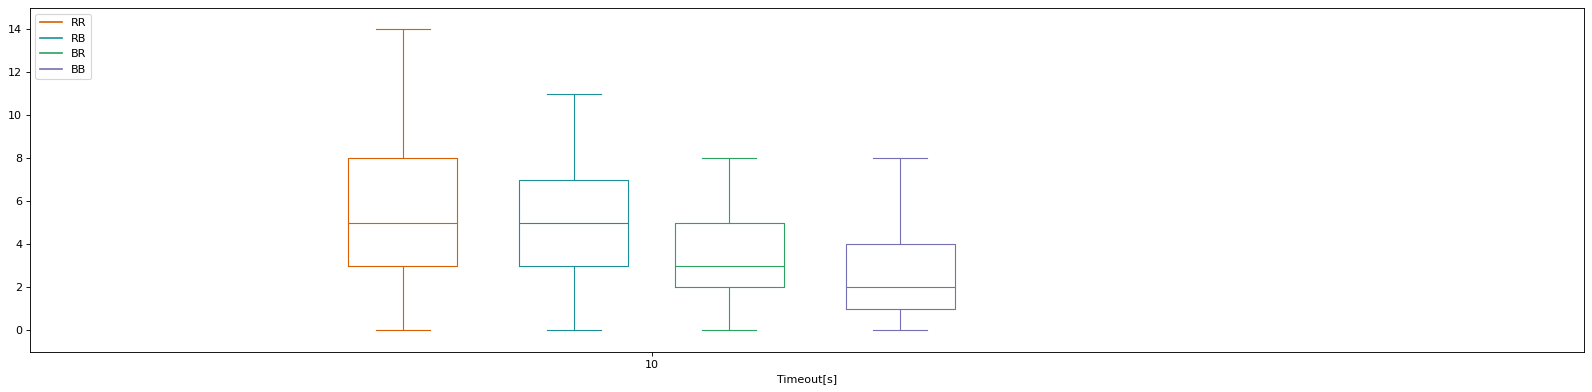

In [75]:
figname = 'timeout_20_adaptive_4_regions_temp2_1800'
grouped_4_boxplot(rr,rb,br,bb,figname)

In [ ]:
# df.mean non considera i NaN values
single_run_mean = timeout_count.mean(axis = 0)

In [ ]:
single_run_mean

In [ ]:
seed

In [ ]:
single_df = single_run_mean.to_frame().T
single_df.index = [seed]
single_df

In [ ]:
# single_run_mean.to_frame().T.to_pickle(os.path.join(results_folder,seed+"_mean_elapsed_timeout.pickle"))

In [ ]:
run_memory_mean = pd.DataFrame()
if os.path.isfile(os.path.join(results_folder,"mean_elapsed_timeout.pickle")):
    print("Appending")
    run_memory_mean = pd.read_pickle(os.path.join(results_folder,"mean_elapsed_timeout.pickle"))
    run_memory_mean = run_memory_mean.append(single_df)
    run_memory_mean.to_pickle(os.path.join(results_folder,"mean_elapsed_timeout.pickle"))
else:
    print("Writing")
    single_df.to_pickle(os.path.join(results_folder,"mean_elapsed_timeout.pickle"))

In [ ]:
run_memory_mean

In [ ]:
df_prova = pd.read_pickle(os.path.join(results_folder,"mean_elapsed_timeout.pickle"))
df_prova

In [ ]:
results_folder1 = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_adaptive/random_mixed'
df_prova = pd.read_pickle(os.path.join(results_folder1,"mean_elapsed_timeout10.pickle"))

In [ ]:
df_prova

In [ ]:
for filename in natsorted(os.listdir(results_folder1)):
    if filename.startswith("mean_elapsed"):
        print('filename: ', filename)
        df_temp = pd.read_pickle(os.path.join(results_folder1,filename))
        print(df_temp)

### Plot the timeout boxplot

In [38]:
def set_box_color(bp, color):
    """
    # Set boxplot rules
    """
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


# def grouped_4_boxplot(rr, rb, br, bb, fig_name):
#     """
#     # Boxplot from three dicts (red,blue,mixed)
#     :param red: dict with red area values
#     :param blue: dict with blue area values
#     :param mixed: dict with red-blue area values
#     :param fig_name: name of the output figure, saved in the current directory
#     :return:
#     """
#     ticks = rr.keys()

#     fig, ax = plt.subplots(figsize=(10, 5), dpi=80)

#     bpRR = plt.boxplot(rr.values(), positions=np.array(range(len(rr.values())))*3.0-0.4, sym='', widths=0.3)
#     bpRB = plt.boxplot(rb.values(), positions=np.array(range(len(rb.values())))*3.0+0.4, sym='', widths=0.3)
#     bpBR = plt.boxplot(br.values(), positions=np.array(range(len(br.values())))*3.0, sym='', widths=0.3)
# #     bpBB = plt.boxplot(bb.values(), positions=np.array(range(len(bb.values())))*3.0, sym='', widths=0.3)

#     set_box_color(bpRR, '#d95f02') # colors are from http://colorbrewer2.org/
#     set_box_color(bpRB, '#ffd700')
#     set_box_color(bpBR, '#ffA500')
# #     set_box_color(bpBB, '#7570b3')

#     # draw temporary rr and blue lines and use them to create a legend
#     plt.plot([], c='#d95f02', label='RR')
#     plt.plot([], c='#ffd700', label='RB')
#     plt.plot([], c='#ffA500', label='BR')
# #     plt.plot([], c='#7570b3', label='BB')
#     plt.legend(loc=2)

#     # plt.xticks(range(0, 300, 5), ticks)
#     # plt.xlim(-3, len(ticks)*3)
#     plt.ylim(-1, 44)
#     plt.xticks(range(0, len(ticks) * 3, 3), ticks)
#     plt.xlim(-2, len(ticks)*3)

#     ax.set_xticklabels(rr.keys())
#     ax.set_xlabel("Timeout[s]")
#     ax.set_ylabel("Completed areas")

#     plt.tight_layout()
# #     plt.savefig(fig_name + '.png')

In [ ]:
results_folder1 = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_adaptive/random_mixed'
df_prova = pd.read_pickle(os.path.join(results_folder1,"mean_run_elapsed_timeout120.pickle"))

In [ ]:
# df_prova

In [ ]:
# df_prova.to_dict()

In [ ]:
# df_prova.to_dict()['RR']

In [ ]:
prova_dict = dict(df_prova['RR'])

In [ ]:
type(df_prova.to_dict('series')['RR'])

In [ ]:
# df_prova.to_dict('series')['RR']
# for k, val in df_prova.to_dict('series')['RR'].items():
#     print("type k:", type(k))
#     print("type val:", type(val))
#     print("k:", k, " val:",val)

In [ ]:
# df_prova['RR'].values

In [ ]:
# print(df_prova.to_dict('r'))

In [ ]:
# print(df_prova.to_dict())

In [ ]:
rr.shape[1]

In [ ]:
rr.values

In [ ]:
rr.shape

In [ ]:
df_prova

In [ ]:
# rr = df_prova['RR']
# rb = df_prova['RB'] 
# br = df_prova['BR']
# bb = df_prova['BB']

In [ ]:
len(rr.values())

In [39]:
def grouped_4_boxplot(rr, rb, br, bb, fig_name):
    ticks = rr.keys()

    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)

    bpRR = plt.boxplot(rr.values(), positions=np.array(range(len(rr.values())))*3.0-0.8, sym='', widths=0.35)
    bpRB = plt.boxplot(rb.values(), positions=np.array(range(len(rb.values())))*3.0-0.25, sym='', widths=0.35)
    bpBR = plt.boxplot(br.values(), positions=np.array(range(len(rr.values())))*3.0+0.25, sym='', widths=0.35)
    bpBB = plt.boxplot(bb.values(), positions=np.array(range(len(bb.values())))*3.0+0.8, sym='', widths=0.35)

    set_box_color(bpRR, '#d95f02') # colors are from http://colorbrewer2.org/
    set_box_color(bpRB, '#1c9099')
    set_box_color(bpBR, '#2ca25f')
    set_box_color(bpBB, '#7570b3')

    # draw temporary rr and blue lines and use them to create a legend
    plt.plot([], c='#d95f02', label='RR')
    plt.plot([], c='#1c9099', label='RB')
    plt.plot([], c='#2ca25f', label='BR')
    plt.plot([], c='#7570b3', label='BB')
    plt.legend(loc=2)

    # plt.xticks(range(0, 300, 5), ticks)
    # plt.xlim(-3, len(ticks)*3)
    plt.ylim(-1, 15)
    plt.xticks(range(0, len(ticks) * 3, 3), ticks)
    plt.xlim(-2, len(ticks)*3)

    ax.set_xticklabels(rr.keys())
    ax.set_xlabel("Timeout[s]")
#     ax.set_ylabel("Elapsed timeout for each kilobot")

    plt.tight_layout()
    plt.savefig(fig_name + '.png')

In [ ]:
results_folder = os.path.join(os.getcwd(), "results_adaptive/" + experiment)
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

rr = {}
rb = {}
br = {}
bb = {}

for mean_timeout in natsorted(os.listdir(os.path.join(results_folder))):
    if not mean_timeout.startswith("mean_run"):
        continue
    
    print(colored("Timeout file:", 'blue'), mean_timeout)
    
    parameters = mean_timeout.split("_")
    for param in parameters:
        if param.startswith("timeout"):
            timeout = int(param.split("#")[-1])
    
    df_timeout = pd.read_pickle(os.path.join(results_folder,mean_timeout))
    rr[timeout] = df_timeout['RR'].values
    rb[timeout] = df_timeout['RB'].values
    br[timeout] = df_timeout['BR'].values
    bb[timeout] = df_timeout['BB'].values    
#     if mean_timeout.endswith("10.pickle"):
#         break

In [ ]:
figname = 'meanElapsedTimeout_groupsize0.75_randomMixed_adaptive.png'
grouped_4_boxplot(rr,rb,br,bb,figname)

In [ ]:
df_timeout = pd.read_pickle(os.path.join(results_folder,mean_timeout))
rr[mean_timeout[-9:-7]] = df_timeout['RR'].values

In [ ]:
rr

In [ ]:
some_array = df_timeout['RR'].values
some_array = some_array.reshape(-1)

In [ ]:
some_array.shape

# Position distribution

In [ ]:
robot_pos_label = [["posx" + str(i) + "_c", "posy" + str(i) + "_c"] for i in range(num_robots)]
robot_pos_label += [["posx" + str(i) + "_s", "posy" + str(i) + "_s"] for i in range(num_robots)]
robot_pos_label = np.reshape(robot_pos_label, (-1))
robot_pos_label = np.append('time', robot_pos_label)
robot_pos_label

In [ ]:
kilo_0_pos = df_kilo_client_temp[robot_pos_label].iloc[:,3:5]
kilo_0_pos

In [ ]:
dist = np.linalg.norm(kilo_0_pos, axis=1)
dist

In [ ]:
robot_origin_distance_df = pd.DataFrame()
for r_idx in range(1,len(robot_pos_label),2):
#     print(df_kilo_client_temp[robot_pos_label].iloc[:2,r_idx:r_idx+2])
    print(r_idx//2)
    r_pos = df_kilo_client_temp[robot_pos_label].iloc[:,r_idx:r_idx+2]
    origin_dist = np.linalg.norm(r_pos, axis=1)
    robot_origin_distance_df['dist'+str(r_idx//2)] = origin_dist

In [ ]:
len(robot_pos_label)

In [ ]:
robot_origin_distance_df['distance0'] = [44]

In [ ]:
robot_origin_distance_df.index = df_kilo_client_temp['time']
robot_origin_distance_df.shape

In [ ]:
bin_edges = np.linspace(0, 0.5, 20)
bin_edges

In [ ]:
hist_val = np.array([])
i=0
for x in robot_origin_distance_df.values:
#     print(x)
    hist, _ = np.histogram(x, bin_edges)
#     print(i,' ',hist)
    i+=1
    hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist
    print(i, '\n', hist_val, end='\n\n')

# for i in range(edges[1:].size):
#     area = np.pi * (np.square(edges[1:][i]) - np.square(edges[1:][i - 1])) if i else np.pi * np.square(edges[1:][i])
#     hist_val[:, i] = np.true_divide(hist_val[:, i], area * runs)

In [ ]:
hist_val.shape

In [ ]:
values = hist_val.T
y_edges = bin_edges[1:].round(decimals=3)
fig = plt.figure(figsize=(10, 5), dpi=80)
# plt.ylabel('Distance from origin')
# plt.xlabel('time(s)')
# plt.legend()
yticks = y_edges
# plt.imshow(distances,interpolation='none')



# print("\t v_max:", v_max)
ax = sns.heatmap(values, yticklabels=yticks, cmap="viridis", vmin=0)#, vmax=v_max)
ax.set_title("Robots diffusion")
ax.set_ylabel('distance from the origin')
ax.set_xlabel('time')
plt.savefig("randomMixed_adaptive_timeout6")

# Generate single df for each timeout

In [ ]:
df_kilo_client_temp.shape

In [ ]:
df_kilo_server_temp.shape

In [ ]:
df_kilo_client_temp.iloc[898:,]

In [ ]:
df_kilo_server_temp.iloc[898:,]

In [ ]:
df_join = pd.DataFrame()
df_join = df_kilo_client_temp.append(df_kilo_server_temp)

In [ ]:
df_join

In [ ]:
num_robots = 24
num_areas = 8

In [ ]:
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_adaptive/random_mixed/'
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

In [ ]:
df_kilo_timeout = pd.DataFrame()

evaluate_run = False

for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):

    if timeout_folder.endswith("pickle"):
        continue

    print(colored("Timeout folder:", 'blue'), timeout_folder)
    timeout = -1
    parameters = timeout_folder.split("_")
    for param in parameters:
        if param.startswith("timeout"):
            timeout = int(param.split("#")[-1]) * 10
            # print("\t timeoutR:",timeoutR)

    if timeout == -1:
        print(colored("\tWARNING: wrong timeout folder", 'red'))
        continue

    # TODO : check for total_timeout_df existence
    if os.path.isfile(os.path.join(results_folder, timeout_folder, "kiloLOG_timeout#"+str(timeout)+"_.pickle")):
        print("Already exists ", os.path.join(results_folder, timeout_folder, "kiloLOG_timeout#"+str(timeout)+"_.pickle"))
    else:
        # print(colored(
        #     os.path.join(results_folder, pickle_file_root"_timeout#"+str(timeout*10)+"_.pickle"),
        #     'red'))
        # sys.exit()
        for filename in natsorted(os.listdir(os.path.join(results_folder, timeout_folder))):
            filename_seed = filename.split("_")[0].split("#")[-1]
            
#             if filename_seed == '3':
#                 filename_seed = '2'
#                 break
            
            
            # print(filename)
            if filename.endswith("areaLOG_client.tsv"):
                if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
                print('\tfilename: ', filename)
                
                df_area_client = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)

            if filename.endswith("areaLOG_server.tsv"):
                if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
                print('\tfilename: ', filename)
                df_area_server = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)

            if filename.endswith("kiloLOG_client.tsv"):
                if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
                print('\tfilename: ', filename)
                df_kilo_client = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)

            if filename.endswith("kiloLOG_server.tsv"):
                if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
                print('\tfilename: ', filename, end='\n')
                df_kilo_server = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t",header=None)
                evaluate_run = True
                
                
            if evaluate_run:
                print(colored("\tEvaluating run:"+filename_seed, 'blue'))
                
                if len(df_kilo_client.columns) > 145:
                    print("\tCutting null elements in client kilo df")
                    df_kilo_client.drop(df_kilo_client.columns[len(df_kilo_client.columns) - 1], axis=1, inplace=True)

                if len(df_kilo_server.columns) > 145:
                    print("\tCutting null elements in server kilo df")
                    df_kilo_server.drop(df_kilo_server.columns[len(df_kilo_server.columns) - 1], axis=1, inplace=True)

                col_kilo_labels = ['time']
                for i in range(0, len(df_kilo_server.columns) - 1, 6):
                    #     print(i,end=", ")
                    col_kilo_labels += ['id' + str(i // 6), 'state' + str(i // 6), 'posx' + str(i // 6), 'posy' + str(i // 6),
                                        'ori' + str(i // 6), 'same_state' + str(i // 6)]

                col_kilo_to_drop = []
                for i in range((len(df_kilo_server.columns) - 1) // 6):
                    #     print(i,end=", ")
                    col_kilo_to_drop += ['same_state' + str(i)]

                df_kilo_server.columns = col_kilo_labels
                df_kilo_client.columns = col_kilo_labels
                df_kilo_server = df_kilo_server.drop(col_kilo_to_drop, axis=1)
                df_kilo_client = df_kilo_client.drop(col_kilo_to_drop, axis=1)

                col_area_labels = ['time']
                for i in range(0, len(df_area_server.columns) - 2, 6):
                    # print(i, end=", ")
                    col_area_labels += ['id' + str(i // 6), 'posx' + str(i // 6), 'posy' + str(i // 6), 'color' + str(i // 6),
                                        'completed' + str(i // 6), 'contained' + str(i // 6)]

                # Remove last empty col and assign labels to df_area_server
                if len(df_area_server.columns) > 49:
                    print("\tCutting null elements in area server df")
                    df_area_server.drop(df_area_server.columns[len(df_area_server.columns) - 1], axis=1, inplace=True)
                df_area_server.columns = col_area_labels

                # First df_area_client row contains garbage, so is substituted with the second row except for the time,
                # then remove Nan values in [:,49:]
                if len(df_area_client.columns) > 49:
                    print("\tCutting null elements in area client df")
                    df_area_client.loc[0, 1:] = df_area_client.loc[1, 1:]
                    df_area_client = df_area_client.drop(np.arange(49, len(df_area_client.columns)), axis=1)
                df_area_client.columns = col_area_labels
                
                area_pos_label = []
                for i in range(num_areas):
                    area_pos_label += ["posx"+str(i)]
                    area_pos_label += ["posy"+str(i)]
                # area_pos_label

                areas_pos = df_area_client[area_pos_label].iloc[0, :].values
                areas_pos = areas_pos.reshape(-1,2)
#                 print(areas_pos)
                
                color_list = ["color" + str(i) for i in range(num_areas)]
                df_area3_s = df_area_server.iloc[:1, :][color_list]
                df_area3_c = df_area_client.iloc[:1, :][color_list]

                for i,idx in enumerate(range(1,len(df_area3_c.columns)*2,2)):
                #     print(i, ' ', idx)
                    df_area3_c.insert(loc=idx, column='other_col'+str(i), value=df_area3_s.iloc[0][i])

                df_area3_c
                client = [col for col in df_area3_c.columns if 'color' in col]
                server = [col for col in df_area3_c.columns if 'other_col' in col]
                df_area_colors = pd.lreshape(df_area3_c, {'color_client' : client, 'color_server' : server})
                area_type = []
                for area in df_area_colors.values:
                    if(area[0] == 0 and area[1] == 0):
                        area_type += ['BB']
                    if(area[0] == 0 and area[1] == 1):
                        area_type += ['BR']
                    if(area[0] == 1 and area[1] == 0):
                        area_type += ['RB']
                    if(area[0] == 1 and area[1] == 1):
                        area_type += ['RR']
                df_area_colors.insert(loc=2, column='area_type', value=area_type)
                
                for i,kilo_id in enumerate(np.arange(1, len(df_kilo_server.columns), 5)):
                    # print(colored("kilo_id:"+str((kilo_id-1)//5), 'blue'))
                #     print(df_kilo_client.iloc[:20, kilo_id+2:kilo_id+4].values, end='\n\n')
                    kilo_pos = df_kilo_server.iloc[:, kilo_id+i+2:kilo_id+i+4].values
                #     print(kilo_pos)
                    in_area=np.empty(kilo_pos.shape[0], dtype=int); in_area.fill(-1)
                    for area_idx, area_pos in enumerate(areas_pos):
                    #     print(area_idx,' ', area_pos)
                        dist = np.linalg.norm(kilo_pos-area_pos, axis=1)
                    #     print(dist, end='\n\n')
                        in_area = np.where(dist < 0.1, df_area_colors.iloc[area_idx][-1][::-1], in_area)
                #     in_area = np.where(in_area == -1, np.NaN, in_area)
                #     print(in_area)
                    df_kilo_server.insert(loc=int(kilo_id+i+2), column='area_type'+str(i), value=in_area)
                    
                for i,kilo_id in enumerate(np.arange(1, len(df_kilo_client.columns), 5)):
#                     print(colored("kilo_id:"+str((kilo_id-1)//5), 'blue'))
                #     print(df_kilo_client.iloc[:20, kilo_id+2:kilo_id+4].values, end='\n\n')
                    kilo_pos = df_kilo_client.iloc[:, kilo_id+i+2:kilo_id+i+4].values
                #     print(kilo_pos)
                    in_area=np.empty(kilo_pos.shape[0], dtype=int); in_area.fill(-1)
                    for area_idx, area_pos in enumerate(areas_pos):
                    #     print(area_idx,' ', area_pos)
                        dist = np.linalg.norm(kilo_pos-area_pos, axis=1)
                    #     print(dist, end='\n\n')
                        in_area = np.where(dist < 0.1, df_area_colors.iloc[area_idx][-1], in_area)
                #     in_area = np.where(in_area == -1, np.NaN, in_area)
                #     print(in_area)
                    df_kilo_client.insert(loc=int(kilo_id+i+2), column='area_type'+str(i), value=in_area)
                    
                df_kilo_single_run = df_kilo_client.join(df_kilo_server, lsuffix='_c', rsuffix='_s')
                df_kilo_single_run = df_kilo_single_run.set_index(df_kilo_single_run.index.astype(str) + '_' + filename_seed)
                
                df_kilo_timeout = df_kilo_timeout.append(df_kilo_single_run)
            
                
                evaluate_run = False
        df_kilo_timeout.to_pickle(os.path.join(results_folder, timeout_folder, "kiloLOG_timeout#"+str(timeout)+"_.pickle"))
        print("Saving at: ", os.path.join(results_folder, timeout_folder, "kiloLOG_timeout#"+str(timeout)+"_.pickle"))
        print("Changing dir")
    
    if(timeout == 20):
        break

In [ ]:
df_kilo_timeout.shape

# Evaluate df of each timeout

In [ ]:
dfPath = "/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_df/persistent/four_regions/kiloLOG_timeout#480_client.pickle"

In [ ]:
df_timeout_client = pd.read_pickle(dfPath)

In [ ]:
df_timeout_client.shape

In [ ]:
df_timeout_client.iloc[:2,:2]

# Devi solo ciclare per le singole run in tutto il dataframe e poi avrai un df (24 * 100 X 4) ----> (num_robot*num_run X type_of_areas)

In [ ]:
first_run_label = [idx for idx in df_timeout_client.index if idx.split("_")[-1] == '100']

In [ ]:
df_timeout_state_client = df_timeout_client.loc[first_run_label, :]

In [ ]:
kilo_resume = [["state" + str(i), "area_type" + str(i)] for i in range(num_robots)]
kilo_resume = np.reshape(kilo_resume, (-1))
# print(kilo_resume)
# server_kilo_resume = df_kilo_server_temp.iloc[:][kilo_resume]
client_kilo_resume = df_timeout_state_client.iloc[:][kilo_resume]

In [ ]:
kilo_resume

In [ ]:
# client_kilo_resume

In [ ]:
timeout_count = pd.DataFrame(columns=['RR', 'RB', 'BR', 'BB'])
for i in range(0,len(client_kilo_resume.columns),2):
#     print(total_exp_df.iloc[:50,i:i+2])
#     print('\n',i)
    kilo_state = client_kilo_resume.iloc[:,i:i+2]
    kilo_state = kilo_state.replace(2,3)
    mask = (kilo_state[kilo_state.columns.values[0]].diff() == 2)
#     print(kilo_state[mask])
#     print(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), end='\n\n')
    robot_timeout = kilo_state[mask][kilo_state.columns.values[1]].value_counts().to_frame().T
#     robot_timeout = pd.DataFrame(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), columns=['RR, RB,BR,BB'])
#     print(robot_timeout)
    timeout_count = timeout_count.append(robot_timeout)
#     print(robot_timeout, end='\n\n')
    
timeout_count = timeout_count.fillna(0)

In [ ]:
dfFolder = "/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_df/"+walk+"/"+experiment

In [ ]:
# kilo_resume = [["state" + str(i) + "_c", "area_type" + str(i) + "_c"] for i in range(num_robots)]
# kilo_resume += [["state" + str(i) + "_s", "area_type" + str(i) + "_s"] for i in range(num_robots)]
# kilo_resume = np.reshape(kilo_resume, (-1))
# kilo_resume

In [ ]:
# df_timeout_state.iloc[:1,:]

# Elapsed timout without mean

In [ ]:
# experiment = "four_regions"
experiment = "random_mixed"

# walk = 'adaptive'
# walk = 'persistent'
walk = 'brownian'

figureName = "elapsedTimeout_groupsize0.75_"+experiment+"_"+walk

dfFolder = "/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_df/"+walk+"/"+experiment

evaluate_elapsed_timeout = False

kilo_resume = [["state" + str(i) + "_c", "area_type" + str(i) + "_c"] for i in range(num_robots)]
kilo_resume += [["state" + str(i) + "_s", "area_type" + str(i) + "_s"] for i in range(num_robots)]
kilo_resume = np.reshape(kilo_resume, (-1))

rr = {}
rb = {}
br = {}
bb = {}

print(colored("FOLDER EXPERIMENT:", 'blue'), dfFolder)
for timeout_df in natsorted(os.listdir(dfFolder)):
    print(colored("Timeout df:", 'blue'), timeout_df)
    
    parameters = timeout_df.split("_")
    for param in parameters:
        if param.startswith("timeout"):
            timeout = param.split("#")[-1]
            print("\ttimeout:",timeout)

    if timeout == -1:
        print(colored("\tWARNING: wrong timeout df", 'red'))
        continue  
        
    if timeout_df.split("_")[-1] == "client.pickle":
        print(colored("\t reading client file" + timeout_df, 'green'))
        df_client = pd.read_pickle(os.path.join(dfFolder, timeout_df))
        
    if timeout_df.split("_")[-1] == "server.pickle":
        print(colored("\t reading server file: " + timeout_df, 'green'))
        df_server = pd.read_pickle(os.path.join(dfFolder, timeout_df))  
#         df_timeout = df_client.append(df_server) 
        df_timeout = df_client.join(df_server, lsuffix='_c', rsuffix='_s') 
#         print("df_timeout.shape", df_timeout.shape)
        evaluate_elapsed_timeout = True
    

    if evaluate_elapsed_timeout:
        print("Evaluating timeout:", timeout)
        timeout_count = pd.DataFrame(columns=['RR', 'RB', 'BR', 'BB'])

        for i in range(1, runs+1):
            run_label = [idx for idx in df_timeout.index if idx.split("_")[-1] == str(i)]
            df_timeout_state = df_timeout.loc[run_label, :]
            timeout_kilo_resume = df_timeout_state.iloc[:][kilo_resume]
#             print(timeout_kilo_resume.iloc[:2,:])

            for i in range(0,len(timeout_kilo_resume.columns),2):
            #     print(total_exp_df.iloc[:50,i:i+2])
            #     print('\n',i)
                kilo_state = timeout_kilo_resume.iloc[:,i:i+2]
                kilo_state = kilo_state.replace(2,3)
                mask = (kilo_state[kilo_state.columns.values[0]].diff() == 2)
            #     print(kilo_state[mask])
            #     print(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), end='\n\n')
                robot_timeout = kilo_state[mask][kilo_state.columns.values[1]].value_counts().to_frame().T
            #     robot_timeout = pd.DataFrame(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), columns=['RR, RB,BR,BB'])
            #     print(robot_timeout)
                timeout_count = timeout_count.append(robot_timeout)
            #     print(robot_timeout, end='\n\n')

        timeout_count = timeout_count.fillna(0)

        rr[timeout] = timeout_count['RR'].values
        rb[timeout] = timeout_count['RB'].values
        br[timeout] = timeout_count['BR'].values
        bb[timeout] = timeout_count['BB'].values
        
        evaluate_elapsed_timeout = False

In [ ]:
timeout_count.shape

In [ ]:
grouped_4_boxplot(rr, rb, br, bb, figureName)

In [ ]:
# rr['10']

In [ ]:
# rr['20']

In [ ]:
# rr['30']

In [ ]:
# rr['300']

In [ ]:
# rr['1800']

In [ ]:
experiment = "four_regions"
# experiment = "random_mixed"

# walk = 'adaptive'
walk = 'persistent'
# walk = 'brownian'

figureName = "completedAreas_groupsize0.75_"+experiment+"_"+walk

dfFolder = "/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_df/"+walk+"/"+experiment

evaluate_completed_areas = False

kilo_resume = [["state" + str(i) + "_c", "area_type" + str(i) + "_c"] for i in range(num_robots)]
kilo_resume += [["state" + str(i) + "_s", "area_type" + str(i) + "_s"] for i in range(num_robots)]
kilo_resume = np.reshape(kilo_resume, (-1))

rr = {}
rb = {}
br = {}
bb = {}

print(colored("FOLDER EXPERIMENT:", 'blue'), dfFolder)
for timeout_df in natsorted(os.listdir(dfFolder)):
    print(colored("Timeout df:", 'blue'), timeout_df)
    
    parameters = timeout_df.split("_")
    for param in parameters:
        if param.startswith("timeout"):
            timeout = param.split("#")[-1]
            print("\ttimeout:",timeout)

    if timeout == -1:
        print(colored("\tWARNING: wrong timeout df", 'red'))
        continue  
        
    if timeout_df.split("_")[-1] == "client.pickle":
        print(colored("\t reading client file" + timeout_df, 'green'))
        df_client = pd.read_pickle(os.path.join(dfFolder, timeout_df))
        
    if timeout_df.split("_")[-1] == "server.pickle":
        print(colored("\t reading server file: " + timeout_df, 'green'))
        df_server = pd.read_pickle(os.path.join(dfFolder, timeout_df))  
#         df_completion = df_client.append(df_server) 
        df_completion = df_client.join(df_server, lsuffix='_c', rsuffix='_s') 
#         print("df_completion.shape", df_completion.shape)
        evaluate_completed_areas = True
    

    if evaluate_completed_areas:
        print("Evaluating timeout:", timeout)
        completed_area_count = pd.DataFrame(columns=['RR', 'RB', 'BR', 'BB'])

        for i in range(1, runs+1):
            run_label = [idx for idx in df_completion.index if idx.split("_")[-1] == str(i)]
            df_completion_state = df_completion.loc[run_label, :]
            timeout_kilo_resume = df_completion_state.iloc[:][kilo_resume]
#             print(timeout_kilo_resume.iloc[:2,:])

            for i in range(0,len(timeout_kilo_resume.columns),2):
            #     print(total_exp_df.iloc[:50,i:i+2])
            #     print('\n',i)
                kilo_state = timeout_kilo_resume.iloc[:,i:i+2]
                kilo_state = kilo_state.replace(2,3)
                mask = (kilo_state[kilo_state.columns.values[0]].diff() == -1)
            #     print(kilo_state[mask])
            #     print(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), end='\n\n')
                robot_completed_area = kilo_state[mask][kilo_state.columns.values[1]].value_counts().to_frame().T
            #     robot_timeout = pd.DataFrame(kilo_state[mask][kilo_state.columns.values[1]].value_counts(), columns=['RR, RB,BR,BB'])
            #     print(robot_timeout)
                completed_area_count = completed_area_count.append(robot_completed_area)
            #     print(robot_timeout, end='\n\n')

        completed_area_count = completed_area_count.fillna(0)

        rr[timeout] = completed_area_count['RR'].values
        rb[timeout] = completed_area_count['RB'].values
        br[timeout] = completed_area_count['BR'].values
        bb[timeout] = completed_area_count['BB'].values
        
        evaluate_completed_areas = False

In [ ]:
completed_area_count.shape

In [ ]:
grouped_4_boxplot(rr, rb, br, bb, figureName)

# Position distribution

In [ ]:
experiment = "four_regions"
# experiment = "random_mixed"

# walk = 'adaptive'
# walk = 'persistent'
walk = 'brownian'

figureName = "spaceDistribution_groupsize0.75_"+experiment+"_"+walk

dfFolder = "/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/results_df/"+walk+"/"+experiment

evaluate_exp = False

bin_edges = np.linspace(0, 0.5, 20)

robot_pos_label = [["posx" + str(i) + "_c", "posy" + str(i) + "_c"] for i in range(num_robots)]
robot_pos_label += [["posx" + str(i) + "_s", "posy" + str(i) + "_s"] for i in range(num_robots)]
robot_pos_label = np.reshape(robot_pos_label, (-1))
robot_pos_label = np.append('time_c', robot_pos_label)


print(colored("FOLDER EXPERIMENT:", 'blue'), dfFolder)
for timeout_df in natsorted(os.listdir(dfFolder)):
    print(colored("Timeout df:", 'blue'), timeout_df)
    
    parameters = timeout_df.split("_")
    for param in parameters:
        if param.startswith("timeout"):
            timeout = param.split("#")[-1]
            print("\ttimeout:",timeout)

    if timeout == -1:
        print(colored("\tWARNING: wrong timeout df", 'red'))
        continue  
        
    if timeout_df.split("_")[-1] == "client.pickle":
        print(colored("\t reading client file" + timeout_df, 'green'))
        df_client = pd.read_pickle(os.path.join(dfFolder, timeout_df))
        
    if timeout_df.split("_")[-1] == "server.pickle":
        print(colored("\t reading server file: " + timeout_df, 'green'))
        df_server = pd.read_pickle(os.path.join(dfFolder, timeout_df))  
#         df_timeout = df_client.append(df_server) 
        df_exp = df_client.join(df_server, lsuffix='_c', rsuffix='_s') 
#         print("df_timeout.shape", df_timeout.shape)
#         print(df_exp.iloc[:1,:])
        evaluate_exp = True
    

    if evaluate_exp:
        robot_origin_distance_df = pd.DataFrame()
        for r_idx in range(1,len(robot_pos_label),2):
        #     print(df_kilo_client_temp[robot_pos_label].iloc[:2,r_idx:r_idx+2])
#             print(r_idx//2, end=", ")
            r_pos = df_exp[robot_pos_label].iloc[:,r_idx:r_idx+2]
            origin_dist = np.linalg.norm(r_pos, axis=1)
            robot_origin_distance_df['dist'+str(r_idx//2)] = origin_dist
        print("robot_origin_distance_df.shape:",robot_origin_distance_df.shape)
        hist_val = np.array([])
#       i=0
        for x in robot_origin_distance_df.values:
        #     print(x)
            hist, _ = np.histogram(x, bin_edges)
        #     print(i,' ',hist)
#           i+=1
            hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist
        #     print(i, '\n', hist_val, end='\n\n')

        # for i in range(edges[1:].size):
        #     area = np.pi * (np.square(edges[1:][i]) - np.square(edges[1:][i - 1])) if i else np.pi * np.square(edges[1:][i])
        #     hist_val[:, i] = np.true_divide(hist_val[:, i], area * runs)
        values = hist_val.T
        y_edges = bin_edges[1:].round(decimals=3)
        fig = plt.figure(figsize=(10, 5), dpi=80)
        # plt.ylabel('Distance from origin')
        # plt.xlabel('time(s)')
        # plt.legend()
        yticks = y_edges
        # plt.imshow(distances,interpolation='none')



        # print("\t v_max:", v_max)
        ax = sns.heatmap(values, yticklabels=yticks, cmap="viridis", vmin=0)#, vmax=v_max)
        ax.set_title("Robots diffusion, timeout:"+timeout)
        ax.set_ylabel('distance from the origin')
        ax.set_xlabel('time')
        print("Saving fig:"+figureName+"timeout#"+timeout)
        plt.savefig(figureName+"timeout#"+timeout+".png")
        
        evaluate_exp = False

In [ ]:
robot_pos_label

In [ ]:
# df_exp[robot_pos_label].iloc[:,r_idx:r_idx+2]
df_exp.iloc[:5,:]

In [ ]:
robot_origin_distance_df.shape

In [ ]:
df1 = robot_origin_distance_df[robot_origin_distance_df.isna().any(axis=1)]
df1

In [ ]:
for x in df1.values:
    print(x)

In [ ]:
bin_edges

In [ ]:
# hist_val = np.array([])
# i=0
# for x in df1.values:
# #     print(x)
#     hist, _ = np.histogram(x, bin_edges)
# #     print(i,' ',hist)
#     i+=1
#     hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist
#     print(i, '\n', hist_val, end='\n\n')

# # for i in range(edges[1:].size):
# #     area = np.pi * (np.square(edges[1:][i]) - np.square(edges[1:][i - 1])) if i else np.pi * np.square(edges[1:][i])
# #     hist_val[:, i] = np.true_divide(hist_val[:, i], area * runs)
# values = hist_val.T
# y_edges = bin_edges[1:].round(decimals=3)
# fig = plt.figure(figsize=(10, 5), dpi=80)
# # plt.ylabel('Distance from origin')
# # plt.xlabel('time(s)')
# # plt.legend()
# yticks = y_edges
# # plt.imshow(distances,interpolation='none')



# # print("\t v_max:", v_max)
# ax = sns.heatmap(values, yticklabels=yticks, cmap="viridis", vmin=0)#, vmax=v_max)
# ax.set_title("Robots diffusion")
# ax.set_ylabel('distance from the origin')
# ax.set_xlabel('time')
# plt.savefig("origin_dist_NAN")

In [ ]:
hist_val = np.array([])
i=0
for x in robot_origin_distance_df.values:
#     print(x)
    hist, _ = np.histogram(x, bin_edges)
#     print(i,' ',hist)
    i+=1
    hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist
#     print(i, '\n', hist_val, end='\n\n')

# for i in range(edges[1:].size):
#     area = np.pi * (np.square(edges[1:][i]) - np.square(edges[1:][i - 1])) if i else np.pi * np.square(edges[1:][i])
#     hist_val[:, i] = np.true_divide(hist_val[:, i], area * runs)
values = hist_val.T
y_edges = bin_edges[1:].round(decimals=3)
fig = plt.figure(figsize=(10, 5), dpi=80)
# plt.ylabel('Distance from origin')
# plt.xlabel('time(s)')
# plt.legend()
yticks = y_edges
# plt.imshow(distances,interpolation='none')



# print("\t v_max:", v_max)
ax = sns.heatmap(values, yticklabels=yticks, cmap="viridis", vmin=0)#, vmax=v_max)
ax.set_title("Robots diffusion")
ax.set_ylabel('distance from the origin')
ax.set_xlabel('time')
# plt.savefig("origin_dist_try")